In [287]:
import pandas as pd
import numpy as np
import warnings

In [288]:
warnings.filterwarnings('ignore')

In [289]:
df = pd.read_csv("Placement.csv")

In [290]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [291]:
df.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,0,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,0,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,0,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,1,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,0,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [292]:
df.shape

(215, 15)

In [293]:
print("No. of Rows :",df.shape[0])
print("No. of Columns :",df.shape[1])

No. of Rows : 215
No. of Columns : 15


In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [295]:
df.describe()

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,0.353488,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,0.479168,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,0.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,0.000000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,0.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,1.000000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,1.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [296]:
 df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

# EDA

In [297]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

# How many students got placed ?

In [298]:
df['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

# Top 5 sci&tech students placed according to their salary ?

In [299]:
df[(df['degree_t'] == 'Sci&Tech') & (df['status'] == 'Placed')].sort_values(by='salary',ascending=False).head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
150,151,0,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.0,Mkt&Fin,61.30,Placed,690000.0
77,78,0,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.0,Mkt&Fin,57.65,Placed,500000.0
163,164,0,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.0,Mkt&Fin,66.46,Placed,500000.0
174,175,0,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.0,Mkt&Fin,66.23,Placed,500000.0
53,54,0,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.0,Mkt&HR,71.04,Placed,450000.0


# Data Preprocessing

In [300]:
x = df.drop(['sl_no','salary'],axis='columns')

# Encodeing the categorical Columns

In [301]:
x['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [302]:
x['ssc_b'] = x['ssc_b'].map({'Central':1,'Others':0})

In [303]:
x['hsc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [304]:
x['hsc_b'] = x['hsc_b'].map({'Central':1,'Others':0})

In [305]:
x['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [306]:
x['hsc_s'] = x['hsc_s'].map({'Commerce':1,'Science':2,'Arts':0})

In [307]:
x['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [308]:
x['degree_t'] = x['degree_t'].map({'Comm&Mgmt':1,'Sci&Tech':2,'Others':0})

In [309]:
x['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [310]:
x['specialisation']=x['specialisation'].map({'Mkt&HR':1,'Mkt&Fin':0})

In [311]:
x['workex'].unique()

array(['No', 'Yes'], dtype=object)

In [312]:
x['workex'] = x['workex'].map({'No':0,'Yes':1})

In [313]:
x['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [314]:
x['status'] = x['status'].map({'Placed':1,'Not Placed':0})

In [315]:
 x.head(15)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,2,0,55.00,1,58.80,1
1,0,79.33,1,78.33,0,2,77.48,2,1,86.50,0,66.28,1
2,0,65.00,1,68.00,1,0,64.00,1,0,75.00,0,57.80,1
3,0,56.00,1,52.00,1,2,52.00,2,0,66.00,1,59.43,0
4,0,85.80,1,73.60,1,1,73.30,1,0,96.80,0,55.50,1
5,0,55.00,0,49.80,0,2,67.25,2,1,55.00,0,51.58,0
6,1,46.00,0,49.20,0,1,79.00,1,0,74.28,0,53.29,0
7,0,82.00,1,64.00,1,2,66.00,2,1,67.00,0,62.14,1
8,0,73.00,1,79.00,1,1,72.00,1,0,91.34,0,61.29,1
9,0,58.00,1,70.00,1,1,61.00,1,0,54.00,0,52.21,0


#  Store Feature Matrix in X and Response(Target) in Vector y

In [316]:
x.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status'],
      dtype='object')

In [317]:
X = x.drop('status',axis =1)
y = x['status']

In [318]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2)

# As our target contains categorical values so it is a classification problem

In [319]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [320]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

svm = SVC()
svm.fit(X_train,y_train)

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

gb = GradientBoostingClassifier()  # Corrected instantiation
gb.fit(X_train, y_train)


GradientBoostingClassifier()

# Prediction on Test Data

In [321]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = knn.predict(X_test)
y_pred4 = dt.predict(X_test)
y_pred5 = rf.predict(X_test)
y_pred6 = gb.predict(X_test)

# Evaluating the algorithms

In [322]:
score1 = lr.score(X_test,y_test)

In [323]:
score2 = svm.score(X_test,y_test)

In [324]:
score3 =knn.score(X_test,y_test)

In [325]:
score4 = dt.score(X_test,y_test)

In [326]:
score5 = rf.score(X_test,y_test)

In [327]:
score6 = gb.score(X_test,y_test)

In [328]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'],'ACCURACY':[score1*100,score2*100,score3*100,score4*100,score5*100,score6*100]})

In [329]:
final_data

,Models,ACCURACY
0,LR,81.395349
1,SVC,74.418605
2,KNN,79.069767
3,DT,72.093023
4,RF,83.720930
5,GB,83.720930


In [330]:
import seaborn as sns


<Axes: xlabel='Models', ylabel='ACCURACY'>

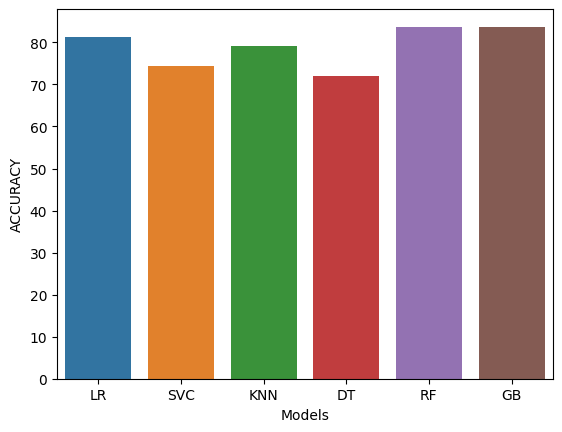

In [334]:
sns.barplot(x=final_data['Models'],y=final_data['ACCURACY'])

# Prediction on New data

In [336]:
new_data = pd.DataFrame({'gender':0,'ssc_p':67.0,'ssc_b':0,'hsc_p':91.0,'hsc_b':0,'hsc_s':1,'degree_p':58.0,'degree_t':2,'workex':0,'etest_p':55.0,'specialisation':1,'mba_p':58.8},index =[0])

In [339]:
RF = RandomForestClassifier()
RF.fit(X,y)

RandomForestClassifier()

In [343]:
p = RF.predict(new_data)
prob = RF.predict_proba(new_data)
if p == 1:
    print('Placed')
    print(f'You will be Placed with the probability of {prob[0][1]:.2f}')
else:
    print('Not Placed')

Placed
You will be Placed with the probability of 0.88


# Saving model using joblib

In [344]:
import joblib
joblib.dump(lr,'model_campus_placement')

['model_campus_placement']

In [ ]:
# Now we can use this saved model anywhere

In [345]:
model = joblib.load('model_campus_placement')

In [346]:
model.predict(new_data)

array([1], dtype=int64)